# Simulation des SIR-Modell der Epidemologie

##### Version 0.2

`Created by Olaf Behrendt 2020-04-02, last change 2020-04-06`

## Vorwort

Im folgenden wollen wir uns mit einem klassischen Modell zur zeitlichen Entwicklung von Infektionskrankheiten, dem SIR-Modell, auseinandersetzen. Dieses wurde von den schottischen Epidemolgen Kermack und McKendrick 1927 in den Proceedings of the Royal Society veröffentlicht. McKendrick war Arzt und Epidemiologe und obwohl er kein Mathematikstudium abgeschlossen hatte, war er dennoch ein brillianter Mathematiker und Pionier auf dem Gebiet der mathematischen Epidemolgie. William Kermark war ein Biochemiker der auch Mathematik studiert hatte. Obwohl er die Giftgasangriffe in den Schützengräben des ersten Weltkriegs überlebte, erblindetete er bei einem mißglückten Laborexperiment im Alter von 26 Jahren.

Ziel ist es das SIR-Modell verständlich und leicht zugänglich zu beschreiben, so dass auch Schüler ab etwa der zehnten Klasse die Darstellung verstehen und nachvollziehen können. Voraussetzung zum Verständnis sind lediglich etwas Schulwissen über Gleichungen, Funktionen und Wahrscheinlichkeiten. Trotzdem müssen wahrscheinlich einige Stellen mehrfach genau gelesen werden. Falls es trotzdem zu Verständnisproblemen kommt, dann ist im Zweifel immer der Autor verantwortlich.

Ein wesentlicher Teil dieser Darstellungen ist das Simulationsmodell. Hier kommen mathematisches Modell und Computer-Programmierung zusammen. Wir können damit spielerisch verschiedene Parameter und Startbedingungen simulieren um ein Verständnis und Gefühl für quantitative Zusammenhänge entwickeln. Auch kann der geneigte Leser den Code als Startpunkt für eigenen Änderungen/Erweiterungen oder Verbesserungen nutzen.

## Einführung

Das SIR-Modell (susceptible-infected-removed model) ist ein mathematisches Modell zur Beschreibung der Ausbreitung von ansteckenden Krankheiten mit Immunitätsbildung ([Deutschsprach. Wikipedia](https://de.wikipedia.org/wiki/SIR-Modell), [Englischsprach. Wikipedia](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SIR_model)). Dabei werden drei Gruppen von Personen modelliert:
 
* $S(t)$ Anteil der infizierbaren Peronen zum Zeitpunkt $t$ (_susceptible_).
* $I(t)$ Anteil der infizierten Personen zum Zeitpunkt $t$  (_infected_).
* $R(t)$ Anteil der wieder gesundeten bzw. verstorbenen Peronen Personen zum Zeitpunkt $t$ (_removed_). Wir nehmen an das Personen in $R$ **immun** sind.

Wir verwenden hier **Anteile** statt absolute Anzahlen, da damit die mathematische Darstellung etwas einfacher wird. Wir können aber natürlich jederzeit von Anteilen in absolute Personenanzahlen umrechenen und umgekehrt.

**Beispiel:** Zum Startzeitpunkt $t=0$ seien in einer Gruppe von insgesamt $N=1000$ Personen (z.B. ein Dorf) zehn Personen infiziert, also $S(0)=10/1000=0,01$. Dann könnte unter gewissen Annahmen zur [Übertragungsrate](#Übertragungsrate) und [recovery-rate](#recovery-rate) die Entwicklung folgendermaßen aussehen:

![](sir-ex1.png)

$$
\begin{array}{r|r|r|r|r}
\text{Tag } t & S(t)\cdot N & I(t)\cdot N & R(t)\cdot N\\
\hline
 0 &  990 &   10 &    0\\
 1 &  980 &   17 &    3\\
 2 &  964 &   27 &    9\\
\vdots & \vdots & \vdots & \vdots\\
 9 &  324 &  347 &  329\\
\vdots & \vdots & \vdots & \vdots\\
28 &   35 &    1 &  964\\
29 &   35 &    1 &  964\\
\end{array}
$$

### Annahmen und Definitionen

Jetzt wollen wir unseren Modellansatz genauer umschreiben, indem wir einige vereinfachende und sinnvolle Anforderungen und Festsetzungen (Definitionen) setzen wollen.

* Eine infizierbare Person in der Gruppe $S$ kann infiziert werden, d.h. in die Gruppe $I$ 
  wechseln und schließlich gesunden/versterben, also in die Gruppe $R$ wechseln.
  D.h. es sind nur folgende Zustandsübergänge möglich: $S\rightarrow I\rightarrow R$.
* $S(t)+I(t)+R(t)=1\;(\forall t\geq 0)$, Insbesondere werden z.B. Geburten und andere Todesfälle,
  also die Demografie, nicht berücksichtigt. 
  Auch nehmen wir an, dass es keine Ein- oder Ausreisen in bzw. aus der Gesamtgruppe
  (Land, Region, Stadt, etc.) gibt, diese also abgeschlossen ist.
* Infizierte sind sofort ansteckend. Wir vereinfachen also den Verlauf der Krankheit indem
  wir annehmen, dass eine infizierte Person sofort andere Personen anstecken kann.
  Tatsächlich gibt es aber meist einen Zeitraum, in der ein Infizierter noch
  nicht den Erreger übertragen kann (die sogenannte [Latenzzeit](#Latenzzeit)).
* Meist setzen wir als Zeiteinheit einen Tag.
* $\pmb\beta$ (beta, engl.: _**contact rate or spreading rate or infection rate**_) ist die durchschnittliche 
  **Übertragungsrate** pro Tag. 
  Die Übertragungsrate müssen wir uns implizit (versteckt) aus zwei bzw. vielen Komponenten zusammengesetzt vorstellen: 
  (1.) Der (biologisch, medizinischen) Infektiosität (engl.: _infectivity_), also die 
  Fähigkeit eines Erregers in einen Wirt einzudringen und die Krankheit auszulösen und 
  (2.) Die Anzahl von Kontakten pro Tag. Wäre z.B. die Infektiosität bekannt und konstant
  gleich $25\%$, dann ist die Wahrscheinlichkeit einer Übertragung (d.h. die Übertragungsrate)
  bei zwei Kontakten pro Tag gleich
  $1-(0,75)^2\approx 44\%$ und bei fünf $76\%$ und bei zehn Kontakten $94\%$.
  Eigentlich gibt es noch vielmehr Faktoren die in die Übertragungsrate eingehen. Z.B. 
  Kontakte in Innenraum oder Außenraum, Temperatur, Luftfeuchte, tragen die Personen Schutzmasken,
  Stärke des Immunsystems, u.s.w.. Festzuhalten bleibt, dass die Übertragungsrate 
  z.B. durch Kontakteinschränkung oder etwa dem Tragen von Schutzmasken verändert werden kann.
  Würde man z.B. alle Kontakte vermeiden, so würde die Übertragungsrate $\beta$ auf Null sinken.
* $\pmb\gamma$ (gamma, engl.: _**recovery-rate**_) ist die durchschnittliche Rate pro Tag, mit der
  eine infizierte Person gesundetet oder verstirbt, also insbesondere **immun** wird. 
  Ist der durchsnittliche Zeitraum in der eine Person ansteckend ist ([Infektiöse Periode](infektiöse-Periode))
  gleich $D_I$ Tage, dann könnent wir $\gamma$ auch durch $\gamma=1/D_I$  ersetzen.
  Es wird also insbesondere angenommen, dass die [Latenzzeit](#Latenzzeit) gleich Null ist.
* Unter der **Basisreproduktionszahl** $\pmb R_0$ (basic reproduction number) versteht man die
  durchschnittliche Anzahl der Personen, die von einer infizierten Person angesteckt werden,
  für den Fall, dass noch keine Person immun ist. Es gilt 
  
  $$
  R_0=\frac{\beta}{\gamma}.
  $$
  
  Ist z.B. $\beta < \gamma$, also $R_0 < 1$, so werden pro Zeiteinheit mehr Personen immun
  als neu infiziert. Ist dagegen $R_0 > 1$, so steigt die Anzahl der infizierten stärker als
  die Anzahl der immunen Personen.

## Motivation der Übergangsraten

Sei $N$ die Größe der Gesamtpolulation (betrachtete Bevölkerung). Dann ist die Gesamtanzahl der Übergänge von $SN\rightarrow IN$, d.h. die Anzahl der Menschen die sich in einem Zeitintervall infizieren, durch 

$$SN\left[\beta\left(\frac{IN}{N}\right)\right] = N\beta IS$$
   
gegeben. Dabei ist $SN$ die Gesamtanzahl infizierbarer Personen und $IN$ der Gesamtanzahl bereits infizierter Persönen. 

Wie kommen wir auf obige Gleichung, bzw. auf die linke Seite (die rechte entsteht durch einfache Umformung der linken Seite)? Schauen wir uns die Gleichung genauer an:

* Der Zähler $IN$ ist die Gesamtanzahl aller Infizierten.
  $\frac{IN}{N}$ ist also die [_Laplace-Wahrscheinlichkeit_](https://de.wikipedia.org/wiki/Laplace-Formel) für des zufälligen Ereignis "Kontakt mit einer infizierte Person" für die
  Grundgesamtheit mit Mächtigkeit $N$. 
* Dann stellt also $\beta\cdot\frac{IN}{N}$ die Gesamtwahrscheinlichkeit dar, dass 
  eine infizierbare Person 
  (1.) auf eine infizierte Person trifft $\left(\frac{IN}{N}\right)$ **und** 
  (2.) sich dabei auch infiziert (Übertragungsrate $\beta$).
* Infizieren können sich aber nur Personen aus der Gruppe $S$ der infizierbaren Personen.
  Das sind dann also im Durchschnitt $SN\cdot \beta\left(\frac{IN}{N}\right) = N\beta IS$ Personen.

gehört. Somit stellt also $\beta I S$ die "Übergangsrate" oder "Übergangswahrscheinlichkeit" pro Person dar. Für diesen Zusammenhang schreiben wir $S\stackrel{\beta\cdot IS}\longrightarrow I$.

Für $\gamma$ ist unmittelbar einsichtig, dass $\gamma I$ die Übergangsrate für neu immunisierte Personen pro Tag darstellt. Wir können hier auch wieder analog $I\stackrel{\gamma\cdot I}\longrightarrow R$ schreiben. Insgesamt erhalten wir also das SIR-(Übergangs)-Modell:

$$S\stackrel{\beta\cdot IS}\longrightarrow I \stackrel{\gamma\cdot I}\longrightarrow R.$$
<!-- [![SIR Zustandsmodell](640px-SIR_Flow_Diagram.svg.png "Viki Male / CC BY-SA (https://creativecommons.org/licenses/by-sa/3.0)")](https://commons.wikimedia.org/wiki/File:SIR_Flow_Diagram.svg) -->

## Dynamik im SIR-Modell

### Bemerkung Differenzenquotient

Um den Ansatz zur Beschreibung der [Dynamik](#Dynamik) der Ausbreitung einer infektiösen Erkrankung besser nachvollziehen zu können, müssen wir uns die Begriffe Ableitung, Differential und Differenzenquotienten etwas näher anschauen.

 
Bei der Formulierung $dS/dt$, u.s.w. handelt es sich um ein sogenanntes **Differential oder Ableitung** der Funktion $S(t)$. Man kann sich aber oft das Differential einach als Bruch von Differenzen (dem **_Differenzenquotienten_**) näherungsweise vorstellen, also:

$$
\frac{dS(t)}{dt} \approx \frac{S(t+\Delta t)-S(t)}{\Delta t} = \frac{\Delta S}{\Delta t}
$$

Ändert sich z.B. $S(t)$ mit der Zeit garnicht oder sehr wenig ($S(t)$ ist konstant), dann ist $\Delta S/\Delta t\approx 0$. Sinkt dagegen $S(t)$ schnell, so wird $\Delta S/\Delta t$ deutlich negativ, u.s.w.. Wir können also auch sagen, dass das Differential die Änderung einer Größe (hier in Abhängigkeit von der Zeit) beschreibt. Ebenso ist z.B. die Geschwindigkeit der Bewegung definiert: Entfernungsänderung pro Zeiteinheit mit der Einheit $km/h$.

Eine [**Differentialgleichungen**](https://de.wikipedia.org/wiki/Gew%C3%B6hnliche_Differentialgleichung) ist eine Gleichungen für eine gesuchte Funktionen in der auch Ableitungen dieser Funktion auftreten können. In unseren Fall handelt es sich um die Funktionen $S(t),I(t)$ und $R(t): \mathbb{R}^+\rightarrow [0,1]$. Zum Verständnis reicht hier festzuhalten, dass Differentialgleichungen eine herausragende Rolle in den Naturwissenschaften spielen, um zeitabhängige Phänomene mathematisch zu formulieren. Genau dies werden wir im nächsten Abschnitt tun, um die zeitliche Veränderung der Größen $S$ (Anteil infizierbarer Personen), $I$ (Anteil infizierter Personen) und $R$ (Anteil immuner Personen) und ihre Abhängigkeiten untereinander zu beschreiben. 

### System von Differentialgleichungen

Wir können die [Dynamik](#Dynamik) des SIR-Modell's durch ein System dreier Differentialgleichungen beschreiben:

$$
\begin{aligned}
{\frac {dS(t)}{dt}} &= -\beta I(t)S(t)\\
{\frac {dI(t)}{dt}} &= \beta I(t)S(t)-\gamma I(t)\\
{\frac {dR(t)}{dt}} &= \gamma I(t)
\end{aligned}
$$

Wenn wir genau hinsehen, können wir die Gleichungen _lesen_:

* Der Anteil **nicht infizierter** Personen $S(t)$ verringert sich pro Zeiteinheit $dt$ um den Anteil neu 
  infizierter Personen $\beta I(t)S(t)$  (siehe Abschnitt [Motivation der Übergangsraten](#Motivation-der-Übergangsraten).
* Der Anteil der **infizierten** Personen $I(t)$ erhöht sich um die neu infizierten $\beta I(t)S(t)$ und verringert 
  sich um den Anteil neu immunisierter Personen $\gamma I(t)$.
* Der Anteil der **imunisierten** (gesundetet/verstorbenen) Personen erhöht sich um den Anteil
  neu immunisierter Personen$\gamma I(t)$

Auch ist unsere Forderungen $S(t)+I(t)+R(t)=1$ aus Abschnitt [Annahmen und Definitionen](#Annahmen-und-Definitionen) erfüllt
Die Summe der Änderungen $\frac {dS(t)}{dt}+\frac {dS(t)}{dt}+\frac {dS(t)}{dt}=0$ (wie man sofort nachrechen kann). D.h. die Anzahl der Personen im System bleibt konstant. 

### Exkurs Wissenschaftliche Methose 

Die Modellierung von natürlichen Phänomen durch mathematische Modelle ist fundamental Wichtig für die naturwissenschaften, in den letzen Jahren aber auch immer stärker in den Sozial- und Geisteswissenschaften, wie etwa Soziologie und Psychologie. Daher an dieser Stelle eine kurze allgemeinere Bemerkung.

Kann man ein natürliches Phänomen durch ein mathematisches Modell beschreiben, so kann man damit Vorhersagen machen und die Ergebnisse mit Experimenten oder Beobachtungen vergleichen. Dadurch ist eine naturwissenschaftliche Theorie (welche immer auf auf einem mathematisches Modell beruht) widerlegbar, was den Kern der **wissenschaftlichen Methode** darstellt. Eine naturwissenschaftliche Theorie ist "wahr", solange sie noch nicht widerlegt ist. Naturwissenschaftliche Theorien lassen sich also streng genommen überhaupt nicht "Beweisen", sondern gelten als "wahr", solange alle Experimente und Beobachtung die Vorhersagen des Modells bestätigen und es (noch) keine bestätigten Experimente/Beobachtungen gibt, die den Vorhersagen des Modells widersprechen.

## Algorithmus zum Lösen des Differentzialgleichungssystem

### Vorbereitungen

Zunächste importieren wir die benötigten Bibliotheken und setzten ein paar Vorgaben für `pyplot`.

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.figsize"] = (8,4)

### Numerische Lösung des DGL-Systems

Wir verwenden ein sehr einfaches Verfahren um das Differentialgleichungssystem des SIR-Modell zu lösen. In der Praxis wird es allerdings meist nicht verwendet, da es meist längere Laufzeit und größere Fehler als andere Verfahren besitzt. Da es aber sehr gut zu verstehen und in wenigen Zeilen zu implementieren ist, nehmen wir die Nachteile gerne in Kauf. Es handelt sich um das nach von Leonhard Euler 1789 entwickelte [Euler-Verfahren](https://de.wikipedia.org/wiki/Explizites_Euler-Verfahren).

Betrachten wir zunächst wieder unser Differentialgleichungssystem, näheren es aber gleich durch [Differenzenquotienten](#Differenzenquotient) an, indem wir einfach $dS(t)/dt$ durch $\Delta S/\Delta t$ ersetzen (analog für $R,I$):

$$
\begin{array}{|rllr|cl|}
\hline
{\displaystyle\frac{\Delta S(t)}{\Delta t}}
  &=& -\beta I(t)S(t) & \Rightarrow & \Delta S(t) &=& -\beta I(t)S(t)\Delta t\\
{\displaystyle\frac{\Delta R(t)}{\Delta t}}
  &=& \gamma I(t) & \Rightarrow & \Delta R(t) &=& \gamma I(t)\Delta t\\
{\displaystyle\frac{\Delta I(t)}{\Delta t}}
  &=& -\left(\displaystyle\frac{\Delta S(t)}{\Delta t}+\frac{\Delta R(t)}{\Delta t}\right) 
    & \Rightarrow & \Delta I(t) &=& -\left(\Delta S(t) + \Delta R(t)\right)\\
\hline
\end{array}
$$

Nehmen wir nun an, wir wollen das SIR-Modell über einen Zeitraum von $t_0$ bis $t_n$ simulieren und zerlegen dieses Intervall in $n$ **gleichlange Teilintervalle** $[t_0, t_1], [t_1, t_2], \ldots, [t_{n-1}, t_n]$. Jedes Teilinterval hat dann die konstante Länge $t_i-t_{i+1}=\Delta t$ für $i=0,\ldots n-1$ (der Einfacheit halber schreiben wir im folgenden statt $S(t_i)$ einfach $S(i)$, u.s.w).

Wie wir aus Abschitt [_Bemerkung Differenzenquotient_](#bemerkung-differenzenquotient) wissen, ist $\Delta S(i) = S(i+1) - S(i)$, d.h. $\Delta S(i)$ die Änderung von $S$ zwischen dem Zeitpunkt $i$ und dem nächsten Zeitpunkt $i+1$. Durch Auflösen nach $S(i+1)$ erhalten wir  

$$S(i+1) = S(i) + \Delta S(i).$$

In Worten: Der Wert $S(i+1)$ im nächsten Zeitschritt ergibt sich aus dem Wert $S(i)$ zum Zeitpunkt $i$ plus der Veränderung $\Delta S(i)$ im Zeitraum $[i,i+1]$.

Analog gilt obiges auf für $I(t)$ und $R(t)$. Damit können wir _iterativ_ (d.h. durch schrittweise Wiederholung) 
die gesuchten Funktionenwerte für $S$,$I$, $R$
zu den Zeitpunkten $0,1,\ldots,n$ bestimmen. Natürlich müssen wir zuvorher
die Startbedingungen $S(0)$, $I(0)$ und $R(0)$ und Parameter $\beta$ und $\gamma$ kennen bzw. schätzen und die 
Anzahl der Iterationsschritte $n$ festlegen. Für $i=1\ldots n$ ergibt sich dann folgender iterativer
Algorithmus:

$$
\begin{aligned}
S_i &= S_{i-1} + \Delta S\\
I_i &= I_{i-1} + \Delta I\\
R_i &= R_{i-1} + \Delta R
\end{aligned}
$$

Dies können wir gleich in einer geigneten Python Funktion implementieren:

In [34]:
### Funktion um die Änderungen für einen Zeitschritt zu berechenen
def step_calc(S,I,R,beta,gamma,i):
    Delta_S = - beta * I[i] * S[i] * Delta_t
    Delta_R = gamma * I[i] * Delta_t
    Delta_I = - (Delta_S + Delta_R)
    S[i+1] = S[i] + Delta_S 
    R[i+1] = R[i] + Delta_R
    I[i+1] = I[i] + Delta_I

### Parameterwerte

Um das implementierte Modell sinnvol parametrisieren zu können, brauchen wir realistische Werte für die Parameter $\beta$, $\gamma$ und $R_0$. Oft sind nur $R_0$ und $D_I$ verfügbar, mit deren Hifde wir aber die Modellparameter $\gamma=1/D_I$ und $\beta=\gamma\cdot R_0$ sofort ableiten können (siehe oben). Hier sind einige Werte zusammengetragen:

$$
\begin{array}{l|r|r|r|r}
\textbf{Quelle}                          & \pmb{D_I} & \pmb{\gamma}\text{ (Tage)} & \pmb{R_0} & \pmb{\beta}\\
\hline
\text{RKI Stand 3. April 2020 (1)}       &          7,0 &                      0.14 &          3,0 &        0.42\\
\text{Kucharski et.al, 26. Feb 2020 (2)} &          5,2 &                      0.19 &          2,5 &        0.48\\
\text{Dehning et.al. 2. Apr 2020 (3)}    &          8,0 &                      0.125 &         3.3 &        0.41
\end{array}
$$

**Anmerkungen** 

* Im Fall RKI (1) haben wir für $D_I$ die mittlere _Zeit von Erkrankungsbeginn bis Hospitalisierung_ verwendet. Dies erscheint als eine eher konservative (risikoarme) Annahme.
* Für unser $D_I$ verwenden wir wie die Autoren aus der Studie den "delay in days between contracting the disease and being recorded". Es ist mir etwas unklar, wie die Autoren $D_I \approx \text{ reporting delay}$ motivieren? Wir erinnern uns, $D_I$ ist die durchschnittliche [infektiöse Periode](#Infektiöse-Periode). Hmm ...

**Literaturhinweise zu Infektionsparameter für SARS-CoV-2**

* (1) [Steckbrief zur Coronavirus-Krankheit-2019 (COVID-19)](https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Steckbrief.html?nn=13490888)
* (2) [Analysis and projections of transmission dynamics of nCoV in Wuhan](https://www.thelancet.com/journals/laninf/article/PIIS1473-3099(20)30144-4/fulltext), [Github Parameters](https://cmmid.github.io/topics/covid19/current-patterns-transmission)
* (3) [Inferring COVID-19 spreading rates and potential change points for case number forecasts, 2020-04-02](https://arxiv.org/abs/2004.01105)


In [35]:
### Startwerte
beta    = 0.41         # Aktuelle Übertragungsrate, kann mittels Besisreproduktionszahl R_0 bestimmt werden: beta = R_0 * gamma
gamma   = 0.125        # Entspricht 1/D_I mit D_I durchschnittliche Dauer der Infektiosität
num     = 83e6         # Gesamtbevölkerung
s       = 1e5/num      # Startanteil der infizierten Personen
n       = 200          # Anzahl der Zeitschritte 
Delta_t = 1            # Länge eines Zeitintervalls (Gesamte Intervallbreite = n * Delta_t)

### Hauptfunktion und graphische Ausgabe

Jetzt brauchen wir nur noch 

* eine Hauptfunktion, die alle Werte der Funktionen schrittweise berechnet und
* eine Funktion welche die Funktionsgraphen geeignet zeichnet.

In [36]:
def simulate(beta,gamma):
    ### Initialisierungen
    S = np.zeros(n)         # Mit 0 initialisiertes Array der Länge n
    I = np.zeros(n)         # Mit 0 initialisiertes Array der Länge n
    R = np.zeros(n)         # Mit 0 initialisiertes Array der Länge n
    I[0] = s
    S[0] = 1.0 - I[0]       # S + I + R = 1.0
    ### Iterationschleife zur Berechnung aller Werte
    for t in range(0, n-1):
        step_calc(S,I,R,beta,gamma,t)
    plot_sim(S,I,R,beta, gamma)
    
### Ausgabe Ergebnis
def plot_sim(S,I,R,beta, gamma):
    x = np.arange(start=0.0, stop=n*Delta_t, step=Delta_t) # x-Werte 
    plt.plot(x, S, label='$S(t)$ (susceptible)')
    plt.plot(x, I, label='$I(t)$ (infected)')
    plt.plot(x, R, label='$R(t)$ (removed)')
    plt.title("SIR-Modell ($R_0=%.3f$, $\\beta=%.3f$, $\\gamma=%.3f$)" % (beta/gamma, beta, gamma))
    plt.xlabel('Zeit in Tagen')
    plt.ylabel('Anteil Bevölkerung')
    plt.text(x[n-1], .22, "Max. Anzahl Infizierte: {:,}".format(int(I.max() * num)), horizontalalignment='right')
    plt.grid()
    plt.legend()
    #plt.savefig("sir-ex1.png")
    plt.show()

### Simulation

Wir wollen drei Simulationen für die Infektion durch SARS-CoV-2 Viren durchführen. 

1. Zunächst verwenden wir die von RKI geschätzen Parameter Basisreproduktionszahl bzw. Übertragungsrate: $R_0=3,3$, $\beta=0.41$.
   Wir sehen, dass wir gelichzeitig mit ca. 30 Mio. Infizierten rechnenen müssten, was bei einer angenommen Rate von 
   %$2\%$ Intensivbehandlungen zu einen Bedarf von $600,000$ Intesivbetten führt.
2. Als nächstes senken wir die Basisreproduktionszahl bzw. die Übertragungsrate um 50%: $R_0=1,64$ bzw, $\beta=0.205$.
   Hier werden "nur" noch ca. $7,5\text{ Mio. }\cdot 2\%=150,000$ Intesivbetten nötig.
3. Senkung der Basisreproduktionszahl bzw. der Übertragungsrate um 69%: $R_0\approx 1,0$ bzw, $\beta\approx 0.13$.
   Jetzt bleibt die Anzahl der Infizierten praktisch konstant auf dem Startwert $S(0)=100000$.

#### Zusammenfassung der Ergebnisse

Um das Gesundheitssystem nicht zu überlasten und gegebenfalls viele unnötige Todesfälle zu vermeiden sollte $R_0$ in Richtung $1.0$ gedrückt werden (besser $< 1.0$). 

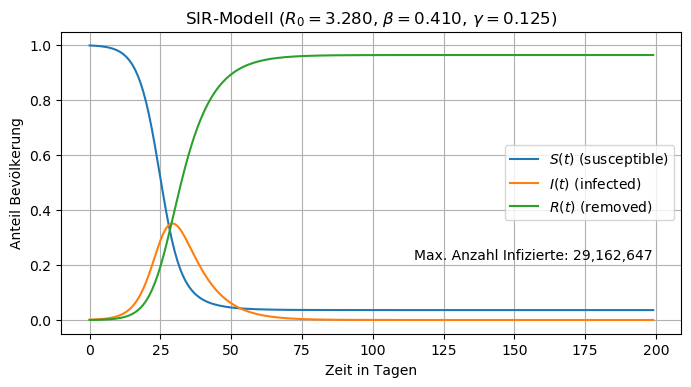

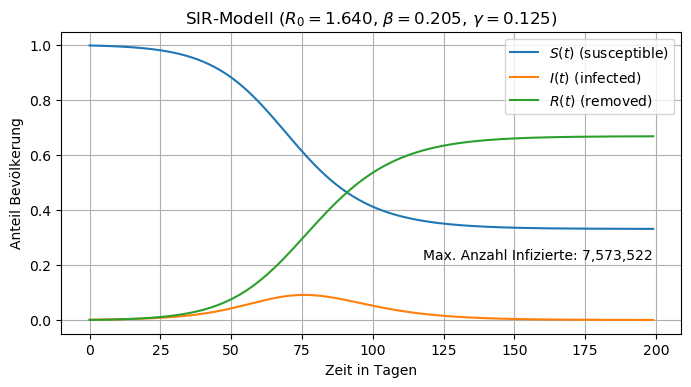

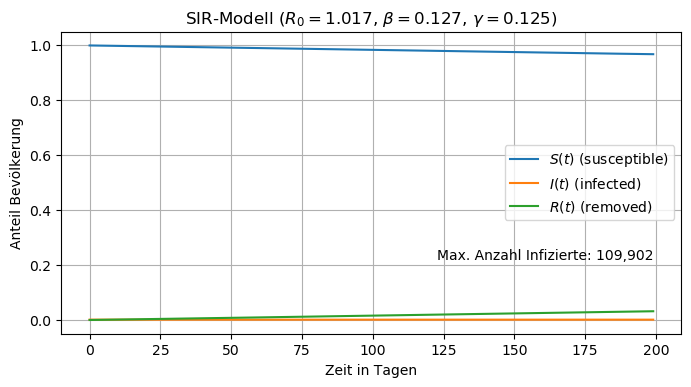

In [37]:
# Führe drei Simulationen aus
# (1) Keine Maßnahmen
simulate(beta, gamma)
# (2) Senke Übertragungsrate bzw. Basisreproduktionszahl R_0 um 1/2
simulate(beta*0.50, gamma)
# (3) Senke Übertragungsrate bzw. Basisreproduktionszahl R_0 um 2/3
simulate(beta*0.31, gamma)

## Glossar

### Ableitung

Die Ableitung einer Funktion $f(x)$ and der Stelle $x_0$ gibt die Steigung des Graphens an der Stelle $(x_0, f(x_0)$ an. Mit anderen Worten, die Ableitung beschreibt die Geschwindigkeit der Änderung einer Funktion (Größe).

### Basisreproduktionszahl

(engl.: basic reproduction number) Unter der Basisreproduktionszahl $R_0$  versteht man die
durchschnittliche Anzahl Personen, die von einer infizierten Person angesteckt werden,
für den Fall, dass noch keine Person immun ist (deshalb der Index $0$ in $R_0$).
Man kann sie mit Hilfe der [Übertragunsrate](Übertragunsrate) $\beta$ und der [recover-rate](#recocery-rate) $\gamma$ berechnen: 

$$R_0=\frac{\beta}{\gamma}$$
  
### Differential

siehe [Ableitung](#Ableitung).

### Differenzenquotient

Der Differenzenquotient ist die Steigung einer Funktion zwischen zwei Stützpunkten $x$ und $x+\Delta x$:

$$\frac{\Delta f(x)}{\Delta x} := \frac{f(x+\Delta x)-f(x)}{\Delta x}$$

Er ist eine erste Näherung für die [Ableitung](#Ableitung) bzw. das Differenzial von $f$ an der Stelle $x$.

### Differentialgleichungen

(engl. differential equation) Ein Differentialgleichung (DG) ist eine Gleichungen für eine gesuchte Funktionen in der auch [Ableitungen](#Ableitung) dieser Funktion auftreten können. Viele naturwissenschaftliche Modelle lassen sich mithilfe von DGs mathematisch beschreiben.

### Dynamik 

In der Physik versteht man unter Dynamik die Bewegung von Körpern in ihrer Abhängigkeit von den einwirkenden Kräften. In unserem Kontext kann man als Körper die Personen in den einzelnen Gruppen verstehen und die Übergangswahrscheinlichkeiten als Kräfte interpretieren. So kann man z.B. $\beta I$ als die "Infektionskraft" auffassen, mit dem eine Personen aus der Gruppe $S$ (infizierbar) in die Gruppe $I$ (infiziert) wechselt.

### Inkubationszeit

(engl.: _incubation period_) Die Zeit zwischen Infektion (aufnahme eines Erregers) und dem Einsetzen der ersten klinischen Symptome.

### Infektiöse Periode

(engl.: _infectious period_) Die Zeit in dem eine Person infektiös ist, d.h. den Krankheitserreger **übertragen** kann.

### Latenzzeit

(engl.: _pre-infectious period_) Die Zeit zwischen Infektion und der Infektiosität, d.h. dem Beginn der [infektiösen Periode](#Infektiöse_Periode).
  
### Recovery-rate

(gamma, engl.: _recovery-rate_) Die recover-rate $\pmb\gamma$ ist die durchschnittliche Rate pro Tag, mit der
eine infizierte Person gesundetet oder verstirbt, also insbesondere **immun** wird. Anders ausgedrückt ist die recover-rate die Rate, mit der eine Person aus der infizierten Gruppe $I$ in die Gruppe $R$ der immunisierten Personen wechselt.

### Übertragungsrate

(engl.: _contact rate or spreading rate or infection rate_) Die Übertragungsrate $\pmb\beta$ ist die durchschnittliche 
  Rate pro Tag, mit der eine infizierbare Person infiziert wird. Anders ausgedrückt ist die Übergangsrate die Rate, mit der eine Person aus der infizierbaren Gruppe $S$ in die Gruppe $I$ der infizierten Personen wechselt.
